In [2]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

## Download Images into tf.images.dataset

In [3]:
Image_size = 256
batch_size = 32

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Potato_Data',
    shuffle=True,
    image_size= (Image_size,Image_size),
    batch_size= batch_size
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

## Data visualization

In [16]:
for image_batch , label_batch in dataset.take(1) :  # It gives us one batch which equals to 32 images 
    print(image_batch[0].numpy()) # because it is a tensor 


[[[137. 125. 129.]
  [140. 128. 132.]
  [169. 157. 161.]
  ...
  [171. 156. 161.]
  [129. 114. 119.]
  [171. 156. 161.]]

 [[158. 146. 150.]
  [134. 122. 126.]
  [111.  99. 103.]
  ...
  [166. 151. 156.]
  [177. 162. 167.]
  [116. 101. 106.]]

 [[121. 109. 113.]
  [121. 109. 113.]
  [133. 121. 125.]
  ...
  [157. 142. 147.]
  [159. 144. 149.]
  [164. 149. 154.]]

 ...

 [[173. 162. 166.]
  [176. 165. 169.]
  [174. 163. 167.]
  ...
  [189. 180. 183.]
  [183. 174. 177.]
  [174. 165. 168.]]

 [[166. 155. 159.]
  [169. 158. 162.]
  [169. 158. 162.]
  ...
  [193. 184. 187.]
  [188. 179. 182.]
  [180. 171. 174.]]

 [[176. 165. 169.]
  [178. 167. 171.]
  [175. 164. 168.]
  ...
  [196. 187. 190.]
  [193. 184. 187.]
  [186. 177. 180.]]]


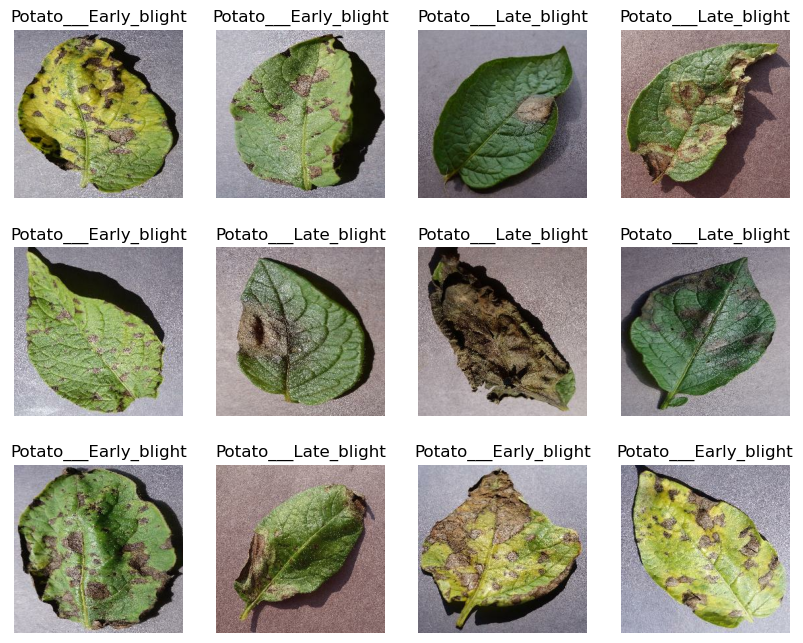

In [33]:


plt.figure(figsize=(10,8))
for image_batch , label_batch in dataset.take (1) :
    for i in range(12) :
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

## Train Test Split

In [34]:
len(dataset)

68

In [66]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [68]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset,len(dataset))

In [70]:
print('Length of Train ds :',len(train_ds))
print('Length of Validation ds :',len(val_ds))
print('Length of Test ds :',len(test_ds))

Length of Train ds : 54
Length of Validation ds : 6
Length of Test ds : 8


In [74]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [76]:
resizing_rescaling = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [78]:
data_augmentation = tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])